- SVM=Support Vector Machine 是支持向量机
- SVC=Support Vector Classification 就是支持向量机用于分类，
- SVR=Support Vector Regression 就是支持向量机用于回归分析

https://zhuanlan.zhihu.com/p/538019344

## 一个用 sklearn 训练 SVM 的简单分类例子-SVC

In [1]:
from sklearn import svm
# 将两个数组作为输入: [n_samples, n_features] 大小的数组 X 作为训练样本,
# [n_samples] 大小的数组 y 作为类别标签(字符串或者整数):
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC(gamma='scale')  # 创建分类器对象，
clf.fit(X, y)  # 用训练数据拟合分类器模型

# clf.score()提供了一个缺省的评估法则来解决问题，即它用训练好的模型在测试集上进行评分（0~1）1分代表最好
print(clf.score([[1., 0.]], [1]))
print(clf.score([[-1., 0.]], [1]))

# 用训练好的分类器去预测[2., 2.]数据的标签
print(clf.predict([[2., 2.]]))
print(clf.predict([[0., -1.]]))

1.0
0.0
[1]
[0]


In [2]:
# 获得支持向量
print(clf.support_vectors_)
# 获得支持向量的索引
print(clf.support_)
# 为每一个类别获得支持向量的数量
print(clf.n_support_)

[[0. 0.]
 [1. 1.]]
[0 1]
[1 1]


```python
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
```

In [3]:
from sklearn.svm import SVC
# 调用 sklearn 内 SVC 的 API 形式如下，里面的参数均为默认参数
SVC( C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, 
cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', 
break_ties=False, random_state=None)

SVC()

主要调节的参数有：C、kernel、degree、gamma、coef0。

C，正则化系数，大于0，选择的越大，表示对错误例惩罚程度越大，可能会导致模型过拟合。

kernel，核函数，用来选择映射到高维线性可分的核函数，默认值为rbf。

degree，多项式核函数的维度，int类型，默认值为3。

gamma，核函数的系数，用于“rbf、poly、sigmoid”，默认值为scale。

coef0，核函数的常数项，只作用于poly和sigmoid核函数。

---

## 一个用 sklearn 训练 SVM 的简单回归例子-SVR

In [4]:
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = svm.SVR()
print(clf.fit(X, y))
print(clf.predict([[1, 1]]))

SVR()
[1.5]


## 线形SVM决策过程的可视化

[[ 1.41281595  1.5303347 ]
 [ 1.81336135  1.6311307 ]
 [ 1.43289271  4.37679234]
 [ 1.87271752  4.18069237]
 [ 2.09517785  1.0791468 ]
 [ 2.73890793  0.15676817]
 [ 3.18515794  0.08900822]
 [ 2.06156753  1.96918596]
 [ 2.03835818  1.15466278]
 [-0.04749204  5.47425256]
 [ 1.71444449  5.02521524]
 [ 0.22459286  4.77028154]
 [ 1.06923853  4.53068484]
 [ 1.53278923  0.55035386]
 [ 1.4949318   3.85848832]
 [ 1.1641107   3.79132988]
 [ 0.74387399  4.12240568]
 [ 2.29667251  0.48677761]
 [ 0.44359863  3.11530945]
 [ 0.91433877  4.55014643]
 [ 1.67467427  0.68001896]
 [ 2.26908736  1.32160756]
 [ 1.5108885   0.9288309 ]
 [ 1.65179125  0.68193176]
 [ 2.49272186  0.97505341]
 [ 2.33812285  3.43116792]
 [ 0.67047877  4.04094275]
 [-0.55552381  4.69595848]
 [ 2.16172321  0.6565951 ]
 [ 2.09680487  3.7174206 ]
 [ 2.18023251  1.48364708]
 [ 0.43899014  4.53592883]
 [ 1.24258802  4.50399192]
 [ 0.00793137  4.17614316]
 [ 1.89593761  5.18540259]
 [ 1.868336    0.93136287]
 [ 2.13141478  1.13885728]
 

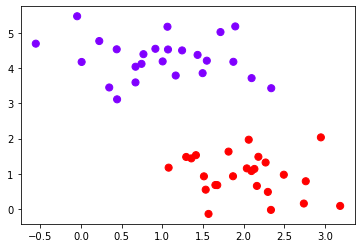

In [5]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# 生成聚类数据集
X,y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.6)
print(X,y)

# plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")#rainbow彩虹色
# plt.xticks([])
# plt.yticks([])
# plt.show()
#首先，需要获取样本构成的平面，作为一个对象。
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

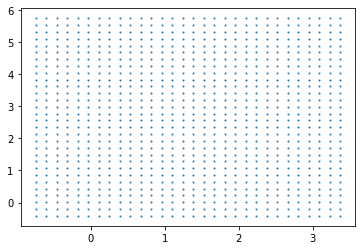

In [6]:
# 制作网格，理解函数meshgrid

#获取平面上两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)
#axisx.shape (30,)
    
axisy,axisx = np.meshgrid(axisy,axisx)
#我们将使用这里形成的二维数组作为我们contour函数中的X和Y
#使用meshgrid函数将两个一维向量转换为特征矩阵
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标
#axisx.shape (30, 30)

xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点
 
plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")

(-0.41872382476349596, 5.754870487889891)

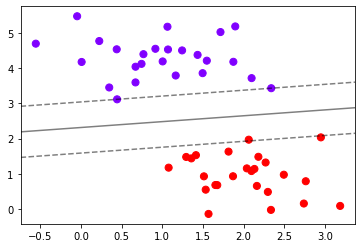

In [8]:
# 画决策边界
#建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(X,y)#计算出对应的决策边界
Z = clf.decision_function(xy).reshape(axisx.shape)  #z.shape (30, 30)
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致

#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图
#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           ,alpha=0.5#透明度
           ,linestyles=["--","-","--"])
 
ax.set_xlim(xlim)#设置x轴取值
ax.set_ylim(ylim)

In [15]:
print(clf.predict(X))
#根据决策边界，对X中的样本进行分类，返回的结构为n_samples

print(clf.score(X,y))
#返回给定测试数据和标签的平均准确度

print(clf.support_vectors_)
#返回支持向量坐标

print(clf.n_support_)
#返回每个类中支持向量的个数

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 0]
1.0
[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]
[2 1]


[-3.33917354]


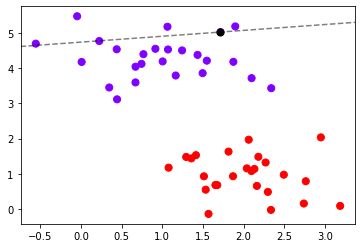

In [12]:
# 过某点的决策边界
level=clf.decision_function(X[10].reshape(1,2))
print(level)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c="black",s=50,cmap="rainbow")
ax = plt.gca()
ax.contour(axisx,axisy,Z
            ,colors="k"
            ,levels=level
            ,alpha=0.5
            ,linestyles=["--"])

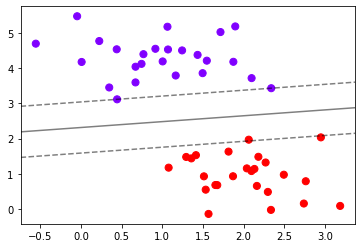

In [12]:
# 将上述过程包装成函数：
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x) 
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"]) 
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
 
# 则整个绘图过程可以写作：
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

## 软间隔与重要参数C

(569, 30)
[0 1]
0.9766081871345029 1.2340816326530613


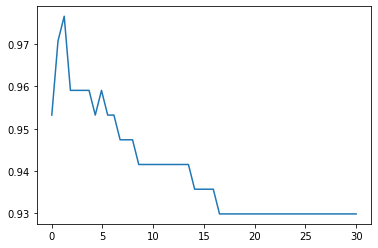

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime
import pandas as pd

data = load_breast_cancer()
X = data.data
y = data.target

print(X.shape)  # (569, 30)
print(np.unique(y))  # [0 1],去除数组中的重复数字，并进行排序之后输出。

from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)

score = []
C_range = np.linspace(0.01, 30, 50)
for i in C_range:
    clf = SVC(kernel="linear", C=i, cache_size=5000).fit(Xtrain, Ytrain)
    score.append(clf.score(Xtest, Ytest))
print(max(score), C_range[score.index(max(score))])
#0.9766081871345029 1.2340816326530613
plt.plot(C_range, score)
plt.show()

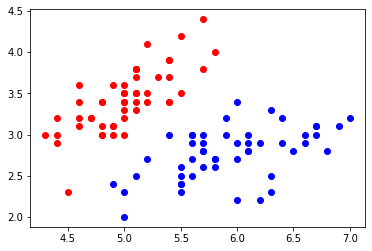

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2,:2]
y = y[y<2]

plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.show()

In [2]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_std = standardScaler.transform(X)

def plot_svc_decision_boundary(model, axis,ax=None):
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
    np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    xy = np.vstack([x0.ravel(), x1.ravel()]).T
    y_predict = model.predict(xy)
    zz = y_predict.reshape(x0.shape)
    P = model.decision_function(xy).reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    if ax is None:
        ax = plt.gca()
        custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
        ax.contourf(x0, x1, zz, cmap=custom_cmap)
        ax.contour(x0, x1, P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"]) 


0.9666666666666667 0.6220408163265306


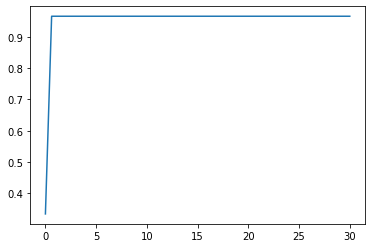

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)

score = []
C_range = np.linspace(0.01, 30, 50)
for i in C_range:
    clf = SVC(kernel="linear", C=i, cache_size=5000).fit(Xtrain, Ytrain)
    score.append(clf.score(Xtest, Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range, score)
plt.show()

SVC(C=1000000000.0, kernel='linear')


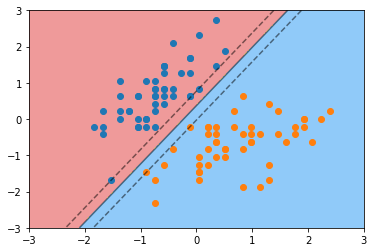

SVC(C=0.005, kernel='linear')


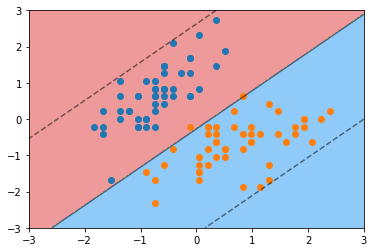

SVC(C=1, kernel='linear')


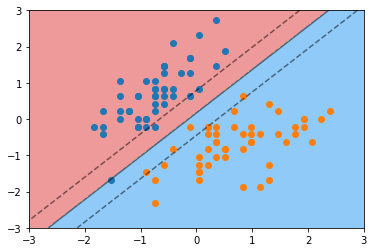

In [6]:
from sklearn.svm import SVC

svc = SVC(kernel='linear',C=1e9)
print(svc.fit(X_std,y))

plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_std[y==0,0], X_std[y==0,1])
plt.scatter(X_std[y==1,0], X_std[y==1,1])
plt.show()

svc2 = SVC(kernel='linear',C=0.005)
print(svc2.fit(X_std,y))

plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_std[y==0,0], X_std[y==0,1])
plt.scatter(X_std[y==1,0], X_std[y==1,1])
plt.show()

svc3 = SVC(kernel='linear',C=1)
print(svc3.fit(X_std,y))

plot_svc_decision_boundary(svc3, axis=[-3, 3, -3, 3])
plt.scatter(X_std[y==0,0], X_std[y==0,1])
plt.scatter(X_std[y==1,0], X_std[y==1,1])
plt.show()

## 非线性SVM与核函数

在sklearn中“kernel"常用选项：

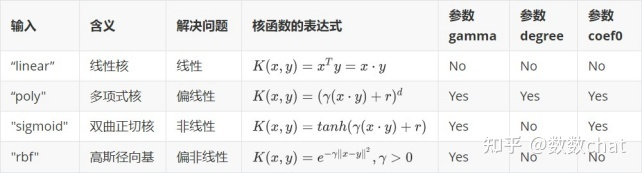

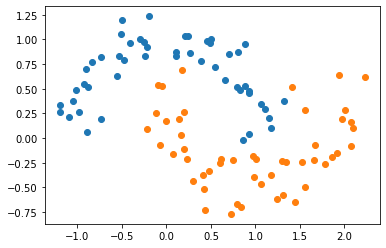

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


X, y = datasets.make_moons(noise=0.15, random_state=666)
#X.shape--(100, 2)    y.shape--(100,)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [13]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

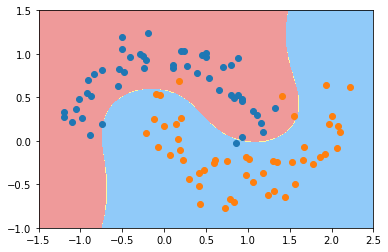

In [14]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),  #扩充原始数据，生成多项式特征；
        ('stdscaler', StandardScaler()),
        ('linearSVC', LinearSVC(C=C))
    ])

poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(X, y)

plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

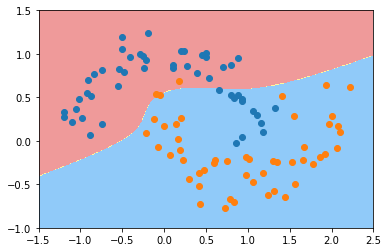

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 当算法SVC()的参数 kernel='poly'时，SVC()能直接达到一种多项式特征的效果；
# 使用 SVC() 前，也需要对数据进行标准化处理
def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('kernelSVC', SVC(kernel='poly', degree=degree, C=C))
    ])

poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X, y)

plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

## rbf

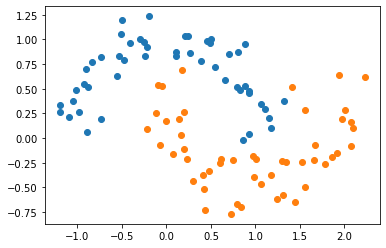

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [17]:
# 导入绘图函数
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
   
# 设计管道
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('svc', SVC(kernel='rbf', gamma=gamma))
    ])

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=0.1))])


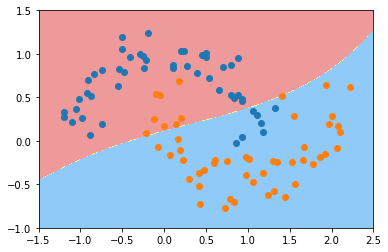

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=0.5))])


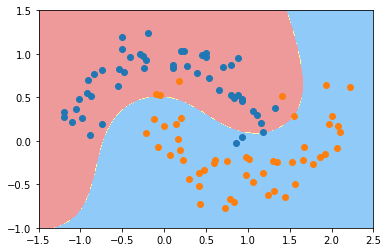

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=1.0))])


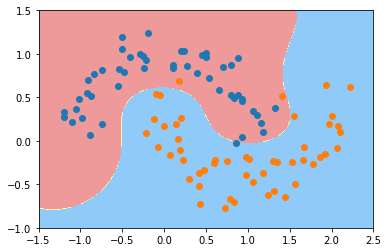

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=10))])


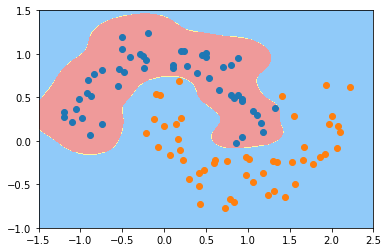

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=100))])


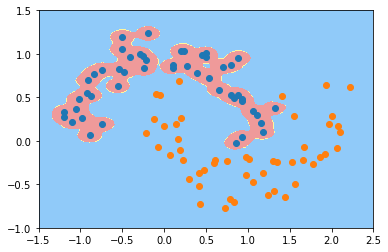

In [18]:
svc_gamma_01 = RBFKernelSVC(gamma=0.1)
svc_gamma_01.fit(X, y)
print(svc_gamma_01)
plot_decision_boundary(svc_gamma_01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()


svc_gamma_05 = RBFKernelSVC(gamma=0.5)
svc_gamma_05.fit(X, y)
print(svc_gamma_05)
plot_decision_boundary(svc_gamma_05, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()


svc_gamma_1 = RBFKernelSVC(gamma=1.0)
svc_gamma_1.fit(X, y)
print(svc_gamma_1)
plot_decision_boundary(svc_gamma_1, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()


svc_gamma_10 = RBFKernelSVC(gamma=10)
svc_gamma_10.fit(X, y)
print(svc_gamma_10)
plot_decision_boundary(svc_gamma_10, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()


svc_gamma_100 = RBFKernelSVC(gamma=100)
svc_gamma_100.fit(X, y)
print(svc_gamma_100)
plot_decision_boundary(svc_gamma_100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

#### gamma越大，高斯分布越窄，样本分布越集中，易过拟合。